# #***PROJECT*** 

MUSICAL INSTRUMENTAL CLASSIFICATION USING CNN 

This project is to classify musical instruments by there images.if we feed an image of a musical instrument  then model will recoganize the instrument and will give the instrument name as output.This model can classify upto 30 different musical instruments


Attaching the code to dataset which is uploaded in google drive

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the required libraries


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
from tensorflow.keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPooling2D, Flatten
from keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


Path to training and test dataset 

In [ ]:
train_dir = '/content/drive/MyDrive/Musical/train/'
test_dir = '/content/drive/MyDrive/Musical/test/'


Counting number of images in each train and test directory

In [36]:
def count_exp(path, set_):
    dict_ = {}
    for instrument in os.listdir(path):
        dir_ = path + instrument
        dict_[instrument] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)


       piano  trombone  steel drum  violin  clarinet  clavichord  alphorn  \
train    124       168         133     148       138         212      139   

       ocarina  banjo  casaba  ...  guiro  flute  tuba  acordian  Tambourine  \
train      132    160     223  ...    122    199   180       214         280   

       dulcimer  castanets  marakas  bagpipes  sitar  
train       131        135      119       142    221  

[1 rows x 30 columns]
      alphorn  trombone  ocarina  violin  piano  clarinet  clavichord  banjo  \
test        5         5        5       5      5         5           5      5   

      steel drum  casaba  ...  flute  acordian  marakas  Tambourine  tuba  \
test           5       5  ...      5         5        5           5     5   

      sitar  bagpipes  dulcimer  castanets  guiro  
test      5         5         5          5      5  

[1 rows x 30 columns]


Plotting the number of available train images in directory

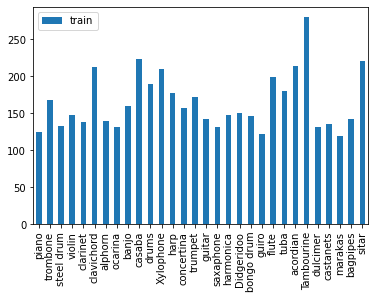

In [37]:
train_count.transpose().plot(kind='bar')

Plotting the number of available test images in directory

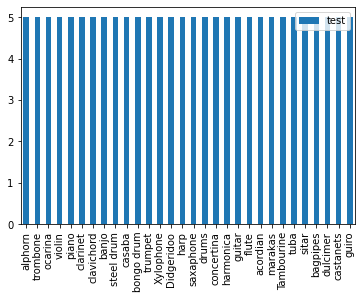

In [38]:
test_count.transpose().plot(kind='bar')

Displaying first image of each instrument in respective Training Directory

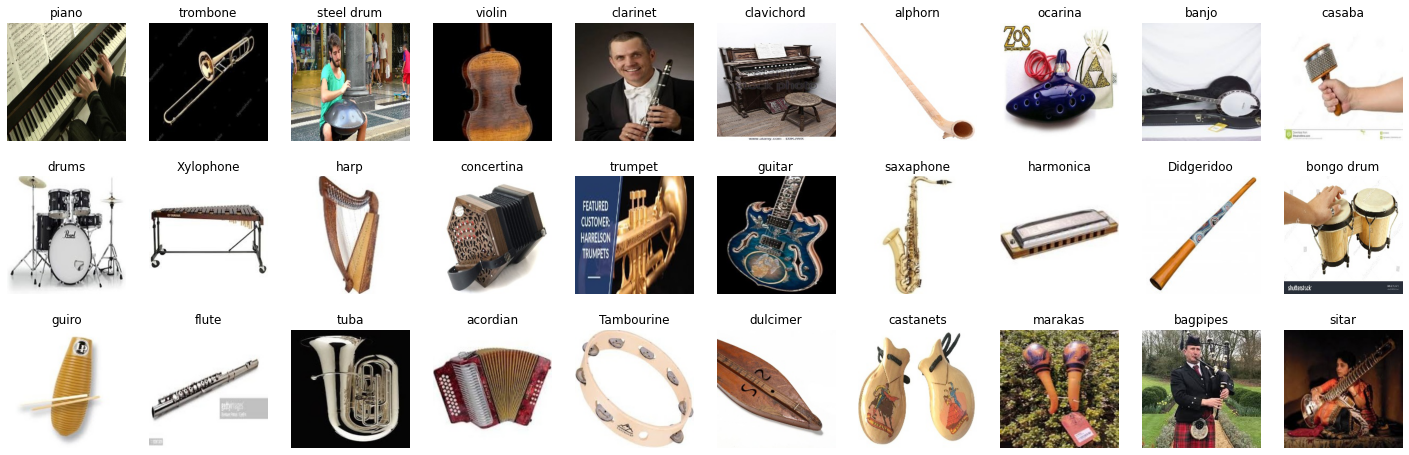

In [39]:
fig = plt.figure(figsize=(25, 8))
i = 1
for instrument in os.listdir(train_dir):
  img = load_img((train_dir + instrument +'/'+ os.listdir(train_dir + instrument)[0]))
  fig.add_subplot(3,10,i)
  plt.imshow(img)
  plt.title(instrument)
  plt.axis('off')
  i += 1
plt.show()


Getting names of instrument to a list

In [40]:
instrument_list = [instrument for instrument in os.listdir(train_dir)]
instrument_list

['piano',
 'trombone',
 'steel drum',
 'violin',
 'clarinet',
 'clavichord',
 'alphorn',
 'ocarina',
 'banjo',
 'casaba',
 'drums',
 'Xylophone',
 'harp',
 'concertina',
 'trumpet',
 'guitar',
 'saxaphone',
 'harmonica',
 'Didgeridoo',
 'bongo drum',
 'guiro',
 'flute',
 'tuba',
 'acordian',
 'Tambourine',
 'dulcimer',
 'castanets',
 'marakas',
 'bagpipes',
 'sitar']

Generating Dataset for Training and Testing

In [41]:
train_data = test_data = []
train_label = test_label = []

def ImageSet_Builder(path):
  image = []
  label = []
  i = 0
  for i in range(0, len(os.listdir(path))):
    t= path+instrument_list[i]+'/'
    for img in os.listdir(path+instrument_list[i]+'/'):
      pic = cv2.imread(os.path.join(path+instrument_list[i],img))
      # pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
      pic = cv2.resize(pic,(48,48))
      image.append(pic)
      label.append(instrument_list[i])
    i += 1
  return image, label

train_data, train_label = ImageSet_Builder(train_dir)
test_data, test_label = ImageSet_Builder(test_dir)

train_data = np.array(train_data)
test_data = np.array(test_data)



In [42]:
train_label[4600]

'bagpipes'

In [43]:
train_data[0]

array([[[174, 203, 207],
        [144, 171, 175],
        [167, 195, 199],
        ...,
        [ 25,  39,  42],
        [  7,  13,  16],
        [  6,  15,  15]],

       [[161, 190, 194],
        [182, 209, 213],
        [154, 183, 187],
        ...,
        [ 31,  48,  50],
        [ 61,  75,  81],
        [187, 209, 214]],

       [[181, 211, 215],
        [157, 186, 190],
        [162, 191, 196],
        ...,
        [  6,  13,  17],
        [196, 229, 233],
        [203, 241, 245]],

       ...,

       [[  1,   7,  11],
        [ 90, 113, 115],
        [ 80, 114, 113],
        ...,
        [ 11,  17,  15],
        [  8,  14,  14],
        [ 16,  25,  24]],

       [[  8,  22,  21],
        [ 52,  66,  66],
        [ 60,  91,  92],
        ...,
        [  9,  14,  13],
        [  7,  12,  11],
        [  9,  14,  13]],

       [[ 68,  96,  97],
        [  5,  10,   9],
        [ 86, 120, 120],
        ...,
        [  8,  13,  12],
        [  6,  11,  10],
        [  6,  11,  10]]

Noramalizing the Training Dataset

In [44]:
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data[0]

array([[[0.68235294, 0.79607843, 0.81176471],
        [0.56470588, 0.67058824, 0.68627451],
        [0.65490196, 0.76470588, 0.78039216],
        ...,
        [0.09803922, 0.15294118, 0.16470588],
        [0.02745098, 0.05098039, 0.0627451 ],
        [0.02352941, 0.05882353, 0.05882353]],

       [[0.63137255, 0.74509804, 0.76078431],
        [0.71372549, 0.81960784, 0.83529412],
        [0.60392157, 0.71764706, 0.73333333],
        ...,
        [0.12156863, 0.18823529, 0.19607843],
        [0.23921569, 0.29411765, 0.31764706],
        [0.73333333, 0.81960784, 0.83921569]],

       [[0.70980392, 0.82745098, 0.84313725],
        [0.61568627, 0.72941176, 0.74509804],
        [0.63529412, 0.74901961, 0.76862745],
        ...,
        [0.02352941, 0.05098039, 0.06666667],
        [0.76862745, 0.89803922, 0.91372549],
        [0.79607843, 0.94509804, 0.96078431]],

       ...,

       [[0.00392157, 0.02745098, 0.04313725],
        [0.35294118, 0.44313725, 0.45098039],
        [0.31372549, 0

In [45]:
train_data.shape

(4943, 48, 48, 3)

Converting the instrument names to numeric value to feed into neural network

In [46]:
label_encoder = LabelEncoder()
train_label_enc = label_encoder.fit_transform(train_label)
train_label_enc = np.asarray(train_label_enc).reshape(-1, 1)
test_label_enc = label_encoder.fit_transform(test_label)
test_label_enc = np.asarray(test_label_enc).reshape(-1, 1)

print(train_label_enc)


# label_train = { v:k for (k,v) in zip(set(train_label), np.unique())}
lt = np.unique(test_label)
lte = np.unique(test_label_enc)
label_test = { v:k for (k,v) in zip(lt, lte)}


[[22]
 [22]
 [22]
 ...
 [24]
 [24]
 [24]]


Converting the Training dataset label into 2d Array using inbuild library

In [ ]:
train_label_cate = to_categorical(train_label_enc, num_classes= 30, dtype="int32")
test_label_cate = to_categorical(test_label_enc, num_classes= 30, dtype="int32")


In [47]:
train_label_cate

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
# num_classes = 30

# model = tf.keras.models.Sequential([
    
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(30, activation='softmax')
# ])



A CNN Neural Network Architecture to Train the dataset

In [ ]:
num_classes = 30
model = tf.keras.models.Sequential([
    
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(30, activation='softmax'),
     
  ])



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

Training the NeuralNetwork

In [ ]:
his = model.fit(train_data, train_label_cate, epochs=30)

Epoch 1/30
155/155 [==============================] - 23s 141ms/step - loss: 3.0516 - accuracy: 0.1633
Epoch 2/30
155/155 [==============================] - 22s 141ms/step - loss: 2.3007 - accuracy: 0.3674
Epoch 3/30
155/155 [==============================] - 21s 135ms/step - loss: 1.9239 - accuracy: 0.4673
Epoch 4/30
155/155 [==============================] - 21s 134ms/step - loss: 1.6281 - accuracy: 0.5345
Epoch 5/30
155/155 [==============================] - 23s 146ms/step - loss: 1.3735 - accuracy: 0.5980
Epoch 6/30
155/155 [==============================] - 21s 135ms/step - loss: 1.1747 - accuracy: 0.6452
Epoch 7/30
155/155 [==============================] - 23s 148ms/step - loss: 0.9295 - accuracy: 0.7166
Epoch 8/30
155/155 [==============================] - 21s 135ms/step - loss: 0.7497 - accuracy: 0.7736
Epoch 9/30
155/155 [==============================] - 21s 135ms/step - loss: 0.5621 - accuracy: 0.8222
Epoch 10/30
155/155 [==============================] - 21s 133ms/step - l

Evaluating the Trained Neural Network with Test Dataset

In [ ]:
model.evaluate(test_data,test_label_cate)

5/5 [==============================] - 0s 36ms/step - loss: 1.9893 - accuracy: 0.7467


[1.9892526865005493, 0.746666669845581]

# OVERVIEW

Model is giving 96% accuracy in Training Data and about 76% accuracy in Testing Data

Predicting the Output from Test Data

In [ ]:
prediction = model.predict(test_data)
prediction[:5]

array([[1.84838993e-12, 1.87797174e-11, 5.54375923e-09, 1.78502194e-06,
        1.99591316e-11, 6.60743849e-10, 6.54677991e-15, 1.88876887e-12,
        1.05304849e-08, 4.07631581e-19, 1.25087854e-05, 2.76480505e-11,
        3.98989863e-09, 3.36209840e-14, 2.69987510e-13, 1.64693226e-09,
        3.12138315e-10, 7.43174012e-12, 6.20292531e-06, 4.38557246e-10,
        3.51636498e-11, 8.58515412e-11, 9.99979377e-01, 9.24245598e-13,
        4.41620744e-15, 6.61694094e-12, 1.67912040e-09, 1.29960057e-07,
        3.52737999e-08, 1.20591149e-14],
       [1.57394302e-12, 4.75281340e-05, 2.36521498e-03, 1.29756809e-04,
        1.33110997e-13, 1.62426105e-07, 4.71935779e-09, 4.42905247e-07,
        3.35408913e-07, 2.45851478e-10, 9.61892365e-04, 4.01680381e-07,
        9.95849587e-06, 1.61490710e-09, 7.06918690e-11, 1.78148584e-05,
        7.42528055e-14, 1.05096779e-10, 5.58186730e-04, 6.69405869e-14,
        3.31890192e-06, 9.23632433e-06, 9.94153559e-01, 2.27103158e-07,
        1.69646794e-12,

Displaying the Predicted OUTPUT

In [ ]:
predicted_classes = [np.argmax(element) for element in prediction]
predicted_classes[:20]

[22, 22, 22, 22, 11, 14, 26, 18, 26, 26, 1, 25, 25, 25, 25, 29, 14, 29, 29, 29]

In [ ]:
label_test

{0: 'Didgeridoo',
 1: 'Tambourine',
 2: 'Xylophone',
 3: 'acordian',
 4: 'alphorn',
 5: 'bagpipes',
 6: 'banjo',
 7: 'bongo drum',
 8: 'casaba',
 9: 'castanets',
 10: 'clarinet',
 11: 'clavichord',
 12: 'concertina',
 13: 'drums',
 14: 'dulcimer',
 15: 'flute',
 16: 'guiro',
 17: 'guitar',
 18: 'harmonica',
 19: 'harp',
 20: 'marakas',
 21: 'ocarina',
 22: 'piano',
 23: 'saxaphone',
 24: 'sitar',
 25: 'steel drum',
 26: 'trombone',
 27: 'trumpet',
 28: 'tuba',
 29: 'violin'}

Converting the predicted numeric value to the corresponding Instrument names

In [ ]:
predicted_classes_labels = []


def predicted_class_convert():
  for p in predicted_classes:
    for (k,v) in label_test.items():
      if k == p:
        predicted_classes_labels.append(v)

  return predicted_classes_labels



predicted_classes_labels = predicted_class_convert()


print(predicted_classes_labels)



['piano', 'piano', 'piano', 'piano', 'clavichord', 'dulcimer', 'trombone', 'harmonica', 'trombone', 'trombone', 'Tambourine', 'steel drum', 'steel drum', 'steel drum', 'steel drum', 'violin', 'dulcimer', 'violin', 'violin', 'violin', 'saxaphone', 'Didgeridoo', 'sitar', 'clarinet', 'clarinet', 'clavichord', 'violin', 'clavichord', 'clavichord', 'clavichord', 'alphorn', 'violin', 'guitar', 'alphorn', 'violin', 'ocarina', 'ocarina', 'dulcimer', 'banjo', 'ocarina', 'banjo', 'banjo', 'guitar', 'sitar', 'banjo', 'casaba', 'casaba', 'casaba', 'casaba', 'casaba', 'drums', 'drums', 'drums', 'drums', 'drums', 'steel drum', 'Xylophone', 'marakas', 'Xylophone', 'Xylophone', 'harp', 'harp', 'harp', 'harp', 'trombone', 'concertina', 'casaba', 'harp', 'concertina', 'concertina', 'trumpet', 'trumpet', 'trumpet', 'trombone', 'trumpet', 'guitar', 'harp', 'guiro', 'guitar', 'guitar', 'saxaphone', 'saxaphone', 'saxaphone', 'saxaphone', 'saxaphone', 'harmonica', 'harmonica', 'harmonica', 'Xylophone', 'harp

#Displaying the Correct Musical Instruments Names

In [ ]:
for i in range(0, 20):
  if predicted_classes[i] == test_label_enc[i]:
    print(i+1, test_label[i])


1 piano
2 piano
3 piano
4 piano
7 trombone
9 trombone
10 trombone
12 steel drum
13 steel drum
14 steel drum
15 steel drum
16 violin
18 violin
19 violin
20 violin


Displaying Images of the Predicted Instrument along with its name

In [ ]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(Y)

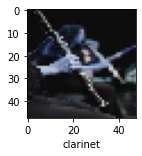

In [ ]:
plot_sample(test_data,test_label[20],20)

Plotting the Accuracy combine with loss Graph using matplotlib

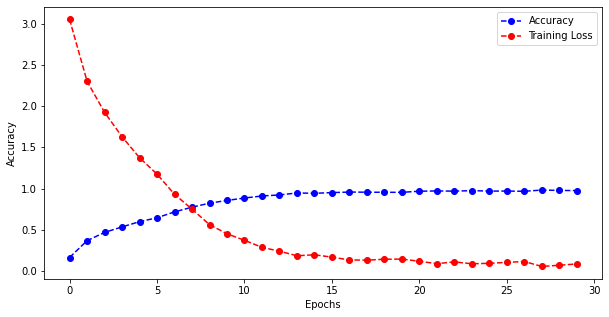

In [ ]:
def plot_accuracy_loss(his):
  acc = his.history['accuracy']
  loss = his.history['loss']

  fig = plt.figure(figsize = (10, 5))


  # epoch_count = range(1, len(loss) + 1)

  plt.plot(acc, 'bo--', label='acc')
  plt.plot(loss, 'ro--', label='loss')
  plt.legend(['Accuracy', 'Training Loss'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.show()


plot_accuracy_loss(his)

Building Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(test_label, predicted_classes_labels)


Plotting the Heatmap with help of seaborn

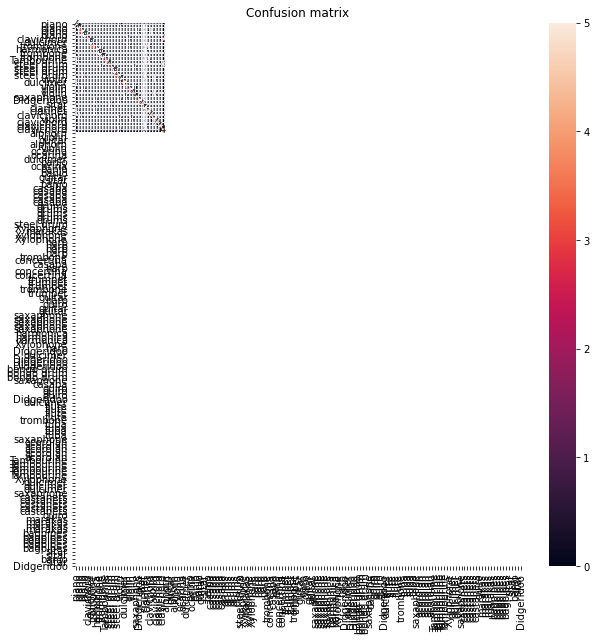

In [ ]:
import seaborn as sns
# ax=plt.axes()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True,xticklabels=predicted_classes_labels, 
           yticklabels=predicted_classes_labels)

ax.set_title('Confusion matrix')
plt.show()

# saving the .h5 model

In [ ]:


 
# save model
model.save('MusicalInstrumentClassification.h5')
print('Model Saved!')
 


Model Saved!


# loading the Saved Model

In [ ]:
# load model
from tensorflow.keras.models import load_model
savedModel=load_model('MusicalInstrumentClassification.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

**bold text**
#CONCLUSION

CNN Neural Network is the best choice to classify the images
Model can classify upto 30 instrumental classes and can give the accuracy of 76% 
